In [1]:
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score


In [2]:
#load stock data
stock=yf.Ticker("NVDA")
stock=stock.history(period= "max")

In [3]:
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.040119,0.044775,0.035581,0.037612,2714688000,0.0,0.0
1999-01-25 00:00:00-05:00,0.040597,0.042029,0.037612,0.041552,510480000,0.0,0.0
1999-01-26 00:00:00-05:00,0.042029,0.042865,0.037731,0.038328,343200000,0.0,0.0
1999-01-27 00:00:00-05:00,0.038447,0.039403,0.036298,0.038209,244368000,0.0,0.0
1999-01-28 00:00:00-05:00,0.038209,0.038447,0.037850,0.038089,227520000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-31 00:00:00-04:00,105.129997,110.959999,103.650002,108.379997,299212700,0.0,0.0
2025-04-01 00:00:00-04:00,108.519997,110.199997,106.470001,110.150002,222614000,0.0,0.0
2025-04-02 00:00:00-04:00,107.290001,111.980003,106.790001,110.419998,220601200,0.0,0.0


In [4]:
stock.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [5]:
nvda = stock.reset_index()

In [6]:
nvda.dtypes

Date            datetime64[ns, America/New_York]
Open                                     float64
High                                     float64
Low                                      float64
Close                                    float64
Volume                                     int64
Dividends                                float64
Stock Splits                             float64
dtype: object

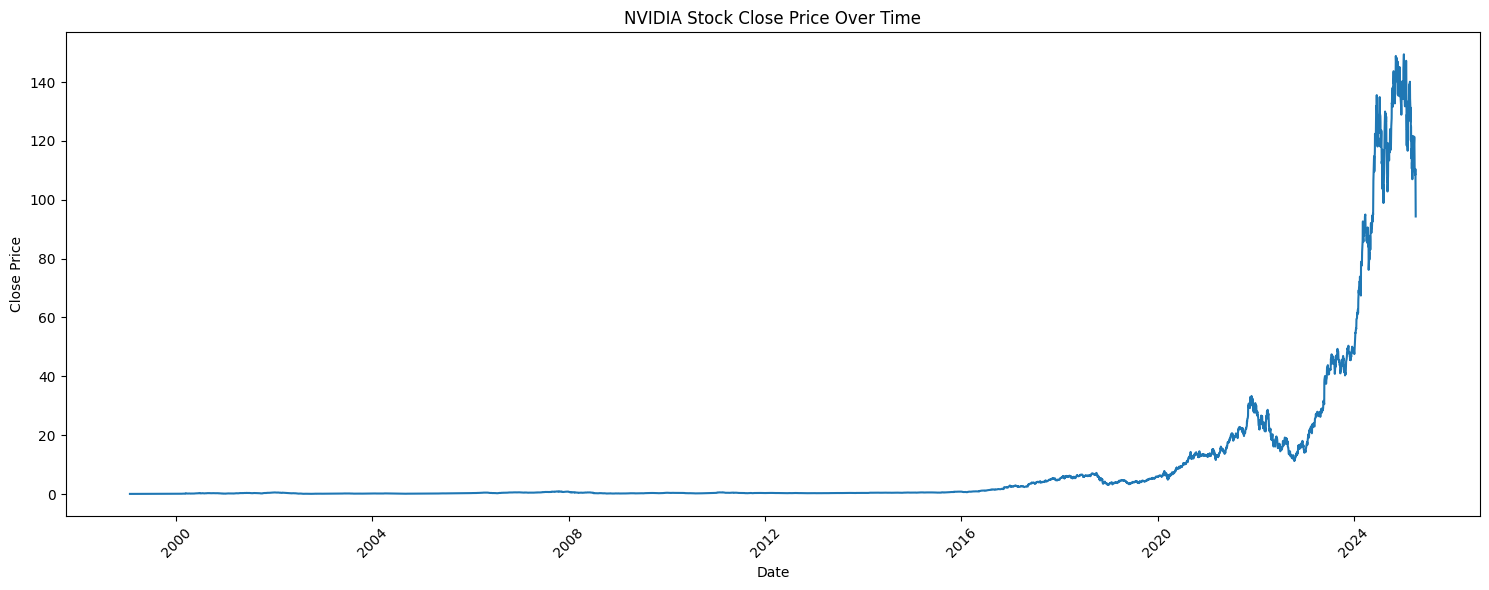

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(nvda['Date'], nvda['Close'])
plt.title('NVIDIA Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
nvda["Tomorrow"] = nvda["Close"].shift(-1)
nvda

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
0,1999-01-22 00:00:00-05:00,0.040119,0.044775,0.035581,0.037612,2714688000,0.0,0.0,0.041552
1,1999-01-25 00:00:00-05:00,0.040597,0.042029,0.037612,0.041552,510480000,0.0,0.0,0.038328
2,1999-01-26 00:00:00-05:00,0.042029,0.042865,0.037731,0.038328,343200000,0.0,0.0,0.038209
3,1999-01-27 00:00:00-05:00,0.038447,0.039403,0.036298,0.038209,244368000,0.0,0.0,0.038089
4,1999-01-28 00:00:00-05:00,0.038209,0.038447,0.037850,0.038089,227520000,0.0,0.0,0.036298
...,...,...,...,...,...,...,...,...,...
6587,2025-03-31 00:00:00-04:00,105.129997,110.959999,103.650002,108.379997,299212700,0.0,0.0,110.150002
6588,2025-04-01 00:00:00-04:00,108.519997,110.199997,106.470001,110.150002,222614000,0.0,0.0,110.419998
6589,2025-04-02 00:00:00-04:00,107.290001,111.980003,106.790001,110.419998,220601200,0.0,0.0,101.800003
6590,2025-04-03 00:00:00-04:00,103.510002,105.629997,101.599998,101.800003,338769400,0.0,0.0,94.309998


In [9]:
nvda["Target"] = (nvda["Tomorrow"] > nvda["Close"]).astype(int)
nvda

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
0,1999-01-22 00:00:00-05:00,0.040119,0.044775,0.035581,0.037612,2714688000,0.0,0.0,0.041552,1
1,1999-01-25 00:00:00-05:00,0.040597,0.042029,0.037612,0.041552,510480000,0.0,0.0,0.038328,0
2,1999-01-26 00:00:00-05:00,0.042029,0.042865,0.037731,0.038328,343200000,0.0,0.0,0.038209,0
3,1999-01-27 00:00:00-05:00,0.038447,0.039403,0.036298,0.038209,244368000,0.0,0.0,0.038089,0
4,1999-01-28 00:00:00-05:00,0.038209,0.038447,0.037850,0.038089,227520000,0.0,0.0,0.036298,0
...,...,...,...,...,...,...,...,...,...,...
6587,2025-03-31 00:00:00-04:00,105.129997,110.959999,103.650002,108.379997,299212700,0.0,0.0,110.150002,1
6588,2025-04-01 00:00:00-04:00,108.519997,110.199997,106.470001,110.150002,222614000,0.0,0.0,110.419998,1
6589,2025-04-02 00:00:00-04:00,107.290001,111.980003,106.790001,110.419998,220601200,0.0,0.0,101.800003,0
6590,2025-04-03 00:00:00-04:00,103.510002,105.629997,101.599998,101.800003,338769400,0.0,0.0,94.309998,0


In [10]:
nvda = nvda.loc["2000-01-01":].copy()
nvda

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
2001,2007-01-08 00:00:00-05:00,0.516271,0.528192,0.507407,0.518259,657270000,0.0,0.0,0.508172,0
2002,2007-01-09 00:00:00-05:00,0.519022,0.522537,0.507560,0.508172,764166000,0.0,0.0,0.533236,1
2003,2007-01-10 00:00:00-05:00,0.502822,0.537974,0.495181,0.533236,1108746000,0.0,0.0,0.531249,0
2004,2007-01-11 00:00:00-05:00,0.533236,0.537363,0.522537,0.531249,924504000,0.0,0.0,0.538433,1
2005,2007-01-12 00:00:00-05:00,0.523302,0.540572,0.520857,0.538433,698190000,0.0,0.0,0.539350,1
...,...,...,...,...,...,...,...,...,...,...
6587,2025-03-31 00:00:00-04:00,105.129997,110.959999,103.650002,108.379997,299212700,0.0,0.0,110.150002,1
6588,2025-04-01 00:00:00-04:00,108.519997,110.199997,106.470001,110.150002,222614000,0.0,0.0,110.419998,1
6589,2025-04-02 00:00:00-04:00,107.290001,111.980003,106.790001,110.419998,220601200,0.0,0.0,101.800003,0
6590,2025-04-03 00:00:00-04:00,103.510002,105.629997,101.599998,101.800003,338769400,0.0,0.0,94.309998,0


In [11]:
#initiate model
model = RandomForestClassifier(n_estimators=100,min_samples_split=100, random_state=42)
train = nvda.iloc[:-100]
test= nvda.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=42)

In [12]:
predictions = model.predict(test[predictors])
#store pred as a df
predictions = pd.Series(predictions, index=test.index)

In [13]:
precision_score(test["Target"], predictions)

0.5

In [14]:
combined = pd.concat([test["Target"], predictions], axis=1)

In [15]:
combined

,Target,0
6492,0,0
6493,1,0
6494,0,0
6495,1,0
6496,0,0
...,...,...
6587,1,1
6588,1,1
6589,0,1
6590,0,1


<Axes: >

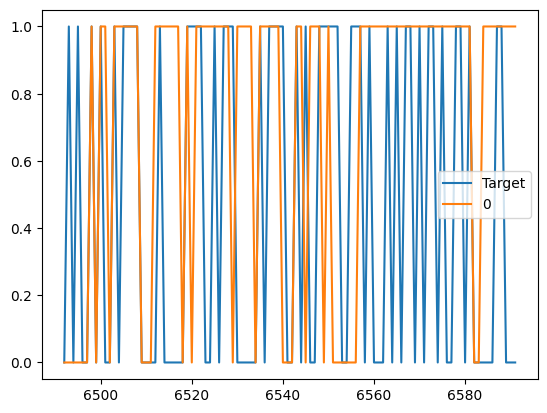

In [16]:
combined.plot()

In [17]:
def predict(train, test, predictors, model): 
        model.fit(train[predictors], train["Target"])
        predictions = model.predict(test[predictors])
        predictions = pd.Series(predictions, index=test.index, name = "Predictions")
        combined = pd.concat([test["Target"], predictions], axis=1)
        return combined

In [18]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [19]:
predictions = backtest(nvda, model, predictors)

In [20]:
predictions["Predictions"].value_counts()

Predictions
0    1320
1     771
Name: count, dtype: int64

In [21]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5278858625162127

In [22]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.541846
0    0.458154
Name: count, dtype: float64

In [23]:
# Prepare a copy of the DataFrame
nvda = nvda.copy()

# Reset the index to make Date a column
nvda = nvda.reset_index(drop=True)

In [24]:
horizons = [2, 5, 60, 250, 1000]

# Initialize new predictors list
new_predictors = []

# Numeric columns for rolling calculations
numeric_columns = ["Close", "Volume", "Open", "High", "Low"]

# Rolling average calculations
for horizon in horizons:
    for col in numeric_columns:
        # Rolling average
        rolling_avg_column = f"{col}_RollingAvg_{horizon}"
        nvda[rolling_avg_column] = nvda[col].rolling(window=horizon, min_periods=1).mean()
        new_predictors.append(rolling_avg_column)
        
        # Close ratio (current value / rolling average)
        ratio_column = f"{col}_Ratio_{horizon}"
        nvda[ratio_column] = nvda[col] / nvda[rolling_avg_column]
        new_predictors.append(ratio_column)

# Trend calculation for Target (modified approach)
for horizon in horizons:
    trend_column = f"Trend_{horizon}"
    # Use a different approach for trend calculation
    nvda[trend_column] = nvda['Target'].rolling(window=horizon, min_periods=1).sum()
    new_predictors.append(trend_column)
# Drop any rows with NaN values
nvda = nvda.dropna()

In [25]:
nvda

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target,...,Open_Ratio_1000,High_RollingAvg_1000,High_Ratio_1000,Low_RollingAvg_1000,Low_Ratio_1000,Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
0,2007-01-08 00:00:00-05:00,0.516271,0.528192,0.507407,0.518259,657270000,0.0,0.0,0.508172,0,...,1.000000,0.528192,1.000000,0.507407,1.000000,0.0,0.0,0.0,0.0,0.0
1,2007-01-09 00:00:00-05:00,0.519022,0.522537,0.507560,0.508172,764166000,0.0,0.0,0.533236,1,...,1.002657,0.525365,0.994618,0.507483,1.000151,1.0,1.0,1.0,1.0,1.0
2,2007-01-10 00:00:00-05:00,0.502822,0.537974,0.495181,0.533236,1108746000,0.0,0.0,0.531249,0,...,0.980723,0.529568,1.015874,0.503382,0.983706,1.0,1.0,1.0,1.0,1.0
3,2007-01-11 00:00:00-05:00,0.533236,0.537363,0.522537,0.531249,924504000,0.0,0.0,0.538433,1,...,1.029735,0.531517,1.010999,0.508171,1.028271,1.0,2.0,2.0,2.0,2.0
4,2007-01-12 00:00:00-05:00,0.523302,0.540572,0.520857,0.538433,698190000,0.0,0.0,0.539350,1,...,1.008424,0.533328,1.013583,0.510708,1.019871,2.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585,2025-03-28 00:00:00-04:00,111.489998,112.870003,109.070000,109.669998,229872500,0.0,0.0,108.379997,0,...,2.122045,53.512451,2.109229,51.430104,2.120742,0.0,0.0,30.0,130.0,535.0
4586,2025-03-31 00:00:00-04:00,105.129997,110.959999,103.650002,108.379997,299212700,0.0,0.0,110.150002,1,...,1.997521,53.609200,2.069794,51.520073,2.011837,1.0,1.0,30.0,131.0,535.0
4587,2025-04-01 00:00:00-04:00,108.519997,110.199997,106.470001,110.150002,222614000,0.0,0.0,110.419998,1,...,2.058245,53.704962,2.051952,51.612327,2.062879,2.0,2.0,30.0,132.0,535.0
4588,2025-04-02 00:00:00-04:00,107.290001,111.980003,106.790001,110.419998,220601200,0.0,0.0,101.800003,0,...,2.031329,53.802566,2.081313,51.704974,2.065372,1.0,2.0,29.0,132.0,534.0


In [26]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, class_weight='balanced',  # Handle class imbalance
    max_depth=10,  # Add some depth constraint
    random_state=42)

def predict(train, test, predictors, model): 
        model.fit(train[predictors], train["Target"])
        predictions = model.predict_proba(test[predictors])[:,1]
        predictions[predictions >= .6] = 1
        predictions[predictions < .6] = 0
        predictions = pd.Series(predictions, index=test.index, name = "Predictions")
        combined = pd.concat([test["Target"], predictions], axis=1)
        return combined

In [27]:
predictions = backtest(nvda, model, new_predictors)

In [28]:
predictions["Predictions"].value_counts()

Predictions
0.0    1209
1.0     881
Name: count, dtype: int64

In [29]:
precision_score(predictions["Target"], predictions["Predictions"])

1.0

In [30]:
# Check prediction distribution
print(predictions["Predictions"].value_counts())

# Check actual target distribution
print(predictions["Target"].value_counts())

# Confusion matrix can provide more insight
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions["Target"], predictions["Predictions"])
print("Confusion Matrix:\n", cm)

Predictions
0.0    1209
1.0     881
Name: count, dtype: int64
Target
1    1133
0     957
Name: count, dtype: int64
Confusion Matrix:
 [[957   0]
 [252 881]]
